<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/Lab_7_LogiReg_FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOGISTIC REGRESSION ON FOREST FIRE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# data = pd.read_csv('forestfires.csv')
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')
data = data.dropna()

In [ ]:
data.sample(7)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
392,1,3,8,0,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76
296,6,4,5,0,90.4,89.5,290.8,6.4,14.3,46,1.8,0.0,0.90
15,6,5,8,5,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00
216,4,4,8,0,92.4,124.1,680.7,8.5,16.9,60,1.3,0.0,29.48
139,1,4,8,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
304,6,5,4,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
76,9,9,1,5,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00


In [ ]:
# Convert categorical variables (months and days) into numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

data['month'] = [months_table.index(month) for month in data['month'] ]
data['day']   = [days_table.index(day)  for day in data['day']   ]

In [ ]:
data['impact'] = [0 if area == 0 else 1 for area in data['area']]
target = data.impact
inputs = data.drop('impact', axis='columns')

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,impact
0,7,5,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [ ]:
data.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,impact
332,4,4,8,6,91.2,124.4,795.3,8.5,17.1,41,2.2,0.0,11.22,1
304,6,5,4,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00,0
16,5,5,2,6,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.00,0
290,2,5,6,6,91.6,104.2,474.9,9.0,18.7,53,1.8,0.0,0.00,0
113,3,4,8,1,91.8,78.5,724.3,9.2,18.9,35,2.7,0.0,0.00,0


In [ ]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,impact
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,6.475822,2.972921,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.522244
std,2.313778,1.229900,2.275990,2.143867,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.499989
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,6.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,7.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,7.000000,5.000000,8.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [ ]:
print(data.shape)

(517, 14)


In [ ]:
print(list(data.columns))

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'impact']


In [ ]:
data['month'].unique()

array([ 2,  9,  7,  8,  3,  5,  6,  1,  0, 11,  4, 10])

In [ ]:
data['month'].value_counts()

7     184
8     172
2      54
6      32
1      20
5      17
9      15
3       9
11      9
0       2
4       2
10      1
Name: month, dtype: int64

In [ ]:
data['day'].value_counts()

0    95
5    85
6    84
1    74
2    64
4    61
3    54
Name: day, dtype: int64

In [ ]:
data['impact'].value_counts()

1    270
0    247
Name: impact, dtype: int64

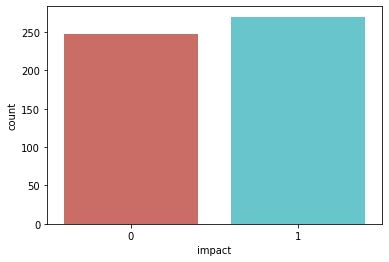

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='impact',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data.groupby('impact').mean()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
impact,,,,,,,,,,,,,
0,4.518219,4.226721,6.165992,2.991903,90.219028,106.679757,522.878138,8.851822,18.427935,44.894737,3.913360,0.013765,0.000000
1,4.807407,4.366667,6.759259,2.955556,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185


In [ ]:
# data.groupby('month').mean()

In [ ]:
#sorting to see which attribute is correlated more to attribut "output" 
data.corr()['impact'].sort_values()

RH       -0.035587
day      -0.008477
rain      0.025550
ISI       0.035663
wind      0.055702
Y         0.056892
X         0.062491
DMC       0.062672
FFMC      0.073823
temp      0.076047
DC        0.096724
month     0.130329
area      0.193224
impact    1.000000
Name: impact, dtype: float64

we can see that attribute "month" is the mostly correlated  to attribute "impact"

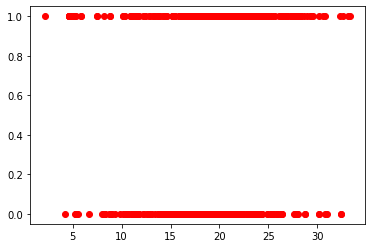

In [ ]:
plt.scatter(data.temp, data.impact, color = 'red')

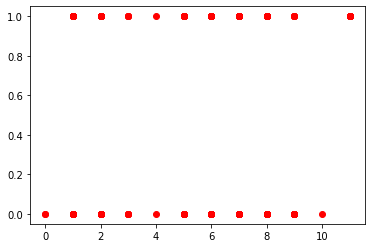

In [ ]:
plt.scatter(data.month, data.impact, color = 'red')

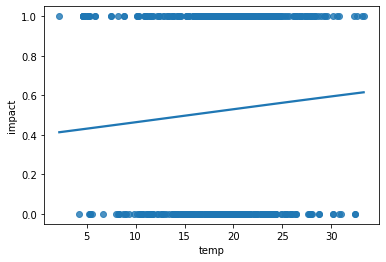

In [ ]:
sns.regplot(x=data.temp, y=data.impact, data=data, logistic=True, ci=None)

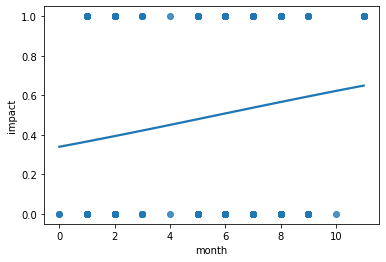

In [ ]:
sns.regplot(x=data.month, y=data.impact, data=data, logistic=True, ci=None)

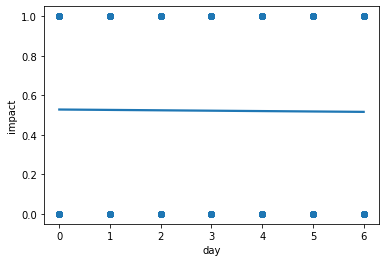

In [ ]:
sns.regplot(x=data.day, y=data.impact, data=data, logistic=True, ci=None)

In [ ]:
# a = data[['month', 'day']]

# sns.regplot(x=a, y=data.impact, data=data, logistic=True, ci=None)

In [ ]:
#standardization of data
scaler = StandardScaler()

t_df = data.drop(['area', 'impact'], axis =1)

#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
# scaled_features = scaler.transform(data.drop('area',axis=1))
inputs = pd.DataFrame(scaled_features,columns=data.columns[:-2])
inputs.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.946441,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-0.454255,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,1.413339,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.946441,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,-1.388053,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [ ]:
# print(inputs)
# print(target)

taking all the columns  for training data set to predict the value

In [ ]:
#dividing dataset into 70-30% training and testing 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

In [ ]:
model = LogisticRegression()

model.fit(x_train, y_train)

# model.predict(x_test)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.5384615384615384

In [ ]:
#finding precision,recall,accuracy
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Precision: 0.5612244897959183
Recall: 0.6547619047619048
Accuracy: 0.5384615384615384


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29 43]
 [29 55]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.45        72
           1       0.56      0.65      0.60        84

    accuracy                           0.54       156
   macro avg       0.53      0.53      0.53       156
weighted avg       0.53      0.54      0.53       156



In [ ]:
# model.predict_proba(x_test)

In [ ]:
#prediction using logistic regression
class_label={1:'There is Fire',0:'There is no fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]

y_predict = model.predict(x_new)
print(class_label[y_predict[0]])

There is Fire


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
x_new=[[6, 5, 9 ,7 ,92.5, 121.1, 674.4, 8.6, 25.1, 27, 4, 0]]

y_predict = model.predict(x_new)
print(class_label[y_predict[0]])

There is no fire


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
